# ２次関数のフィッティング

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import torch

N = 100 # 入力層の次元
M = 500 # 隠れ層の次元

np.random.seed(123)
x = np.random.randn(N)
y = x ** 2 + np.random.randn(N) * 0.1

x = torch.tensor(x).float()
y = torch.tensor(y).float()

x_train = x[:N // 2]
x_test  = x[N // 2:]
y_train = y[:N // 2]
y_test  = y[N // 2:]


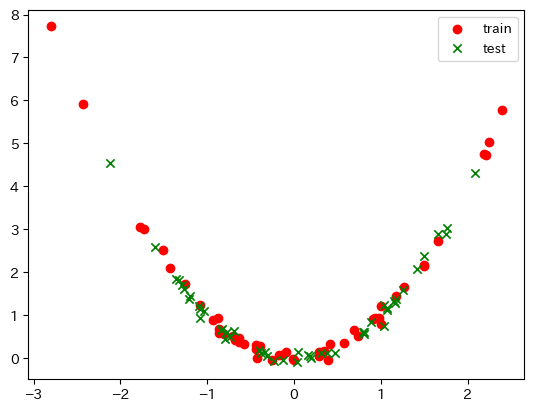

In [14]:
plt.scatter(x_train, y_train, c='r', label='train')
plt.scatter(x_test, y_test, c='g', marker='x', label='test')
plt.legend()

In [15]:
from torch import nn

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        relu = nn.ReLU(inplace=True)
        # これがレイヤー関数
        self.net = nn.Sequential(
            nn.Linear(n_input, M),
            relu,
            nn.Linear(M, n_output),
        )
    def forward(self, x):
        return self.net(x)

net = Net(N // 2, N // 2)

outputs = net(x_train)


In [16]:
for param in net.named_parameters():
    print(param)

('net.0.weight', Parameter containing:
tensor([[-0.0146, -0.1061, -0.1160,  ..., -0.0644, -0.0015,  0.0780],
        [-0.0948, -0.1056, -0.0724,  ..., -0.0160, -0.1216,  0.0736],
        [ 0.0419,  0.1412,  0.1115,  ..., -0.0312,  0.0218, -0.0913],
        ...,
        [ 0.0660,  0.0970,  0.0999,  ..., -0.0776, -0.0083,  0.0578],
        [ 0.1392, -0.1056, -0.0281,  ...,  0.1366,  0.0917, -0.0379],
        [-0.1036, -0.0012, -0.1279,  ...,  0.0393,  0.0484,  0.1284]],
       requires_grad=True))
('net.0.bias', Parameter containing:
tensor([ 0.0088, -0.0273, -0.0053,  0.1192, -0.0749, -0.0809, -0.1007,  0.0248,
         0.1062, -0.0638,  0.0101, -0.1080,  0.0060,  0.0379,  0.0440,  0.1112,
        -0.1126, -0.1156, -0.1034, -0.1084, -0.0669,  0.0601, -0.0115,  0.1366,
        -0.0352,  0.1208,  0.0324, -0.0381, -0.0104, -0.1017, -0.0334, -0.1068,
         0.0086, -0.1148,  0.1376, -0.0539, -0.0507,  0.0380,  0.0319, -0.0279,
        -0.0784,  0.0853, -0.0082,  0.0635, -0.1363, -0.1185, 

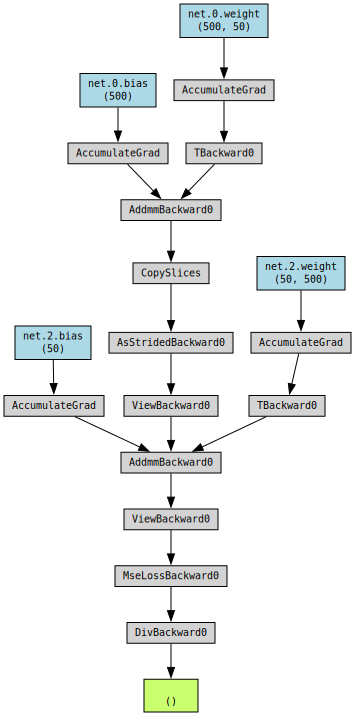

In [17]:
criterion = nn.MSELoss().float()

loss = criterion(outputs, y_train) / 2.0

from torchviz import make_dot
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)


In [18]:
loss.backward()

In [19]:
import torch.optim as optim

lr = 0.001
optimizer = optim.SGD(net.parameters(), lr=lr)

optimizer.step()
optimizer.zero_grad()

In [20]:
num_epochs = 2000

history = np.array((0, 2))
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(x_train)
    loss = criterion(outputs, y_train) / 2.0
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 100 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch / Loss = {epoch} / {loss.item():.5f}')


Epoch / Loss = 0 / 2.64314
Epoch / Loss = 100 / 1.53201
Epoch / Loss = 200 / 0.80742
Epoch / Loss = 300 / 0.37033
Epoch / Loss = 400 / 0.14857
Epoch / Loss = 500 / 0.05372
Epoch / Loss = 600 / 0.01814
Epoch / Loss = 700 / 0.00589
Epoch / Loss = 800 / 0.00188
Epoch / Loss = 900 / 0.00059
Epoch / Loss = 1000 / 0.00019
Epoch / Loss = 1100 / 0.00006
Epoch / Loss = 1200 / 0.00002
Epoch / Loss = 1300 / 0.00001
Epoch / Loss = 1400 / 0.00000
Epoch / Loss = 1500 / 0.00000
Epoch / Loss = 1600 / 0.00000
Epoch / Loss = 1700 / 0.00000
Epoch / Loss = 1800 / 0.00000
Epoch / Loss = 1900 / 0.00000


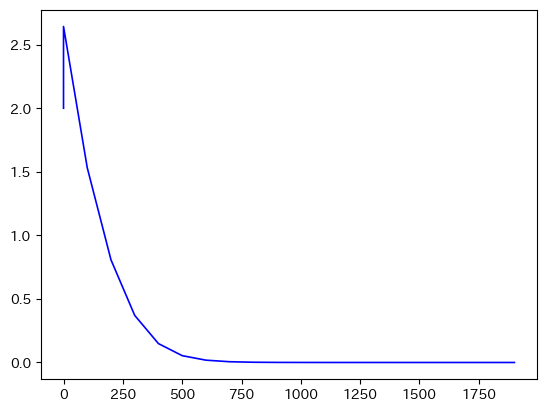

In [21]:
plt.plot(history[:, 0], history[:, 1], 'b')

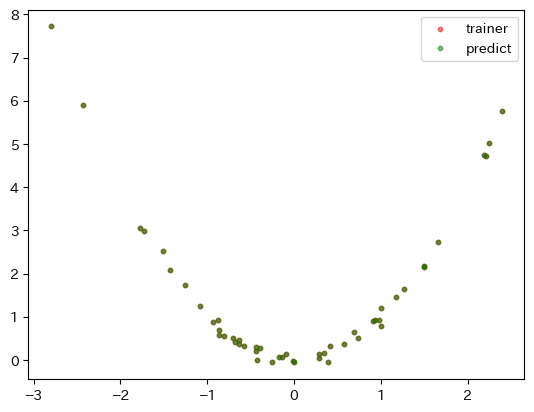

In [22]:
plt.scatter(x_train.data.numpy(), y_train.data.numpy(), c='r', s=10, label='trainer', alpha=0.5)
plt.scatter(x_train.data.numpy(), outputs.data.numpy(), c='g', s=10, label='predict', alpha=0.5)
plt.legend()

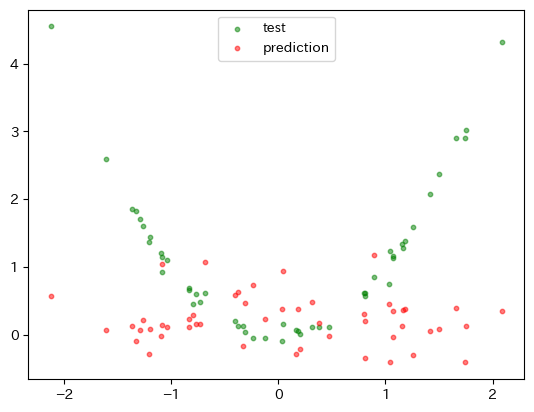

In [23]:
plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c='g', s=10, label='test', alpha=0.5)
plt.scatter(x_test.data.numpy(), net(x_test).data.numpy(), c='r', s=10, label='prediction', alpha=0.5)
plt.legend()